In [ ]:
!pip install tensorflow-federated

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.6/721.6 kB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.7/73.7 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.2/323.2 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 1.5 MB/s eta 0:00:00
     ━━━

# **Dataset**

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/CICIoV2024/hexadecimal.csv')
data


<ipython-input-1-42ba12e3d27c>:4: DtypeWarning: Columns (1,5,7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/CICIoV2024/hexadecimal.csv')


,Interface,ID,DLC,DATA_0,DATA_1,DATA_2,DATA_3,DATA_4,DATA_5,DATA_6,DATA_7,label,category,specific_class
0,slcan0,041,[8],60,00,00,00,00,00,00,00,BENIGN,BENIGN,BENIGN
1,slcan0,42C,[8],84,0D,A0,00,00,00,00,00,BENIGN,BENIGN,BENIGN
2,slcan0,217,[8],7F,FF,7F,FF,7F,FF,7F,FF,BENIGN,BENIGN,BENIGN
3,slcan0,083,[8],0F,E0,00,00,00,00,00,00,BENIGN,BENIGN,BENIGN
4,slcan0,3A8,[8],01,00,27,10,00,00,00,00,BENIGN,BENIGN,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408214,slcan0,80,[8],84,3,2,23,18,5,8A,22,ATTACK,SPOOFING,STEERING_WHEEL
1408215,slcan0,80,[8],84,3,2,23,18,5,8A,22,ATTACK,SPOOFING,STEERING_WHEEL
1408216,slcan0,80,[8],84,3,2,23,18,5,8A,22,ATTACK,SPOOFING,STEERING_WHEEL
1408217,slcan0,80,[8],84,3,2,23,18,5,8A,22,ATTACK,SPOOFING,STEERING_WHEEL


# **Binary Classification using "label"**

**2 clients, 1D conv, Adam, lr=0.001**

<ipython-input-2-9311496158a0>:11: DtypeWarning: Columns (1,5,7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/CICIoV2024/hexadecimal.csv")


Training and Testing Results
Round 1, Training accuracy: 0.9930, Training loss: 0.0261, Num examples: 1126575, Num batches: 35206


<ipython-input-2-9311496158a0>:101: DeprecationWarning: `tff.learning.build_federated_evaluation` is deprecated, use `tff.learning.algorithms.build_fed_eval` instead.
  eval_process = tff.learning.build_federated_evaluation(model_fn)


Round 2, Training accuracy: 0.9953, Training loss: 0.0245, Num examples: 1126575, Num batches: 35206
Round 3, Training accuracy: 0.9960, Training loss: 0.0140, Num examples: 1126575, Num batches: 35206
Round 4, Training accuracy: 0.9945, Training loss: 0.0400, Num examples: 1126575, Num batches: 35206
Round 5, Training accuracy: 0.9957, Training loss: 0.0203, Num examples: 1126575, Num batches: 35206


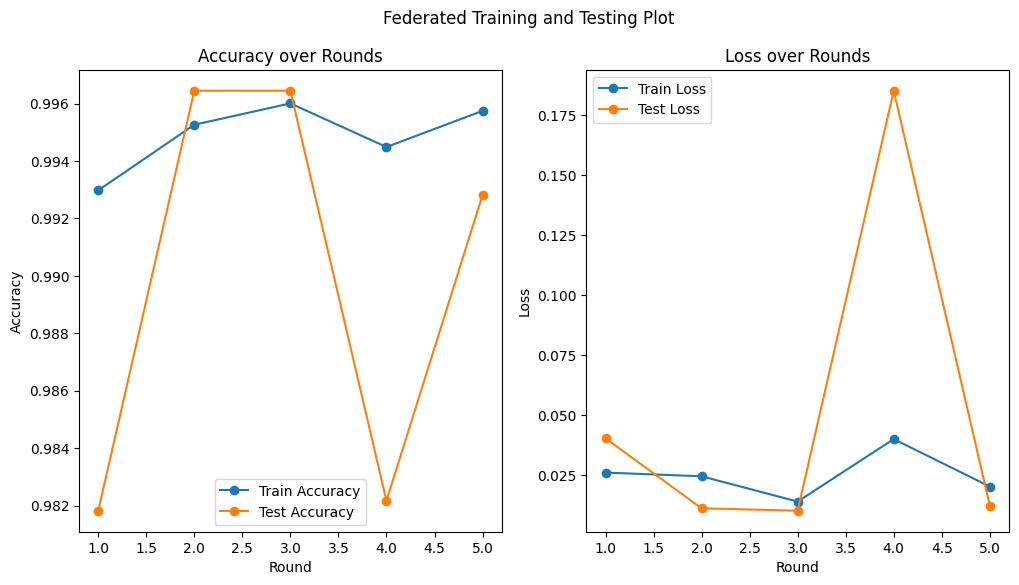

8802/8802 [==============================] - 19s 2ms/step


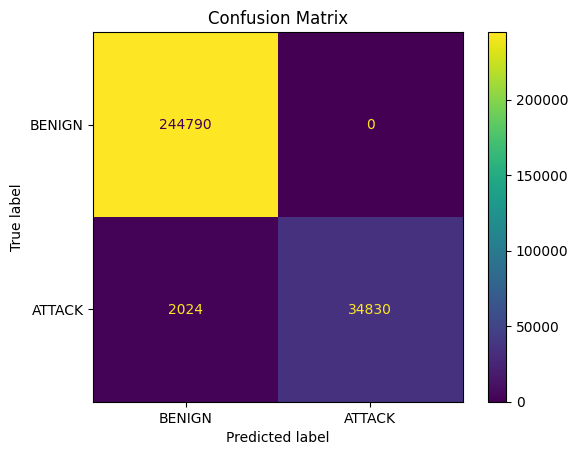

In [ ]:
import pandas as pd
import numpy as np
import collections
import tensorflow as tf
import tensorflow_federated as tff
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/CICIoV2024/hexadecimal.csv")

# Convert hexadecimal values to integers, only if they are valid hexadecimal strings
def hex_to_int(value):
    try:
        return int(str(value), 16)
    except ValueError:
        return value

hex_columns = ['DATA_0', 'DATA_1', 'DATA_2', 'DATA_3', 'DATA_4', 'DATA_5', 'DATA_6', 'DATA_7']
for col in hex_columns:
    df[col] = df[col].apply(hex_to_int)

# Encode string labels into numerical values
label_mapping = {label: index for index, label in enumerate(df['label'].unique())}
df['label'] = df['label'].map(label_mapping)

# Split the data into train and test sets (80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Create train data for clients
def create_tf_dataset_for_client(client_data):
    data = client_data[hex_columns].values.astype(np.float32)
    labels = client_data['label'].values.astype(np.int32)
    return tf.data.Dataset.from_tensor_slices((data, labels)).batch(32)

# Split the train_df into two parts
client_data_splits = np.array_split(train_df, 2)

# Create TF datasets for each client
train_data = [create_tf_dataset_for_client(client_data) for client_data in client_data_splits]

# Create a TF dataset for the test data
test_data = tf.data.Dataset.from_tensor_slices(
    (test_df[hex_columns].values.astype(np.float32), test_df['label'].values.astype(np.int32))
).batch(32)

# Define the Keras model
def build_keras_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Reshape((8, 1), input_shape=(8,)),
        tf.keras.layers.Conv1D(32, 2, activation='relu'),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Conv1D(64, 2, activation='relu'),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(np.max(df['label']) + 1, activation='softmax')
    ])
    return model

# Wrap a Keras model for use with TFF.
def model_fn():
    keras_model = build_keras_model()
    return tff.learning.models.from_keras_model(
        keras_model,
        input_spec=train_data[0].element_spec,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )

# Simulate a few rounds of training with the selected client devices.
trainer = tff.learning.algorithms.build_weighted_fed_avg(
    model_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.Adam(learning_rate=0.001)
)

state = trainer.initialize()

# Lists to store training and testing metrics
train_accuracies = []
train_losses = []
test_accuracies = []
test_losses = []

print("Training and Testing Results")

for round_num in range(5):
    # Training
    state, metrics = trainer.next(state, train_data)

    train_accuracy = metrics['client_work']['train']['sparse_categorical_accuracy']
    train_loss = metrics['client_work']['train']['loss']
    num_examples = metrics['client_work']['train']['num_examples']
    num_batches = metrics['client_work']['train']['num_batches']
    train_accuracies.append(train_accuracy)
    train_losses.append(train_loss)
    print(f'Round {round_num+1}, Training accuracy: {train_accuracy:.4f}, Training loss: {train_loss:.4f}, Num examples: {num_examples}, Num batches: {num_batches}')

    # Testing
    eval_process = tff.learning.build_federated_evaluation(model_fn)
    model_weights = trainer.get_model_weights(state)
    test_metrics = eval_process(model_weights, [test_data])['eval']
    test_accuracy = test_metrics['sparse_categorical_accuracy']
    test_loss = test_metrics['loss']
    test_accuracies.append(test_accuracy)
    test_losses.append(test_loss)
    #print(f"Round {round_num+1}, Testing accuracy: {test_accuracy:.4f}, Testing loss: {test_loss:.4f}, Num examples: {test_metrics['num_examples']}, Num batches: {test_metrics['num_batches']}")

# Plot training and testing results
rounds = range(1, 6)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(rounds, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(rounds, test_accuracies, marker='o', label='Test Accuracy')
plt.title('Accuracy over Rounds')
plt.xlabel('Round')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(rounds, train_losses, marker='o', label='Train Loss')
plt.plot(rounds, test_losses, marker='o', label='Test Loss')
plt.title('Loss over Rounds')
plt.xlabel('Round')
plt.ylabel('Loss')
plt.legend()

plt.suptitle('Federated Training and Testing Plot')
plt.show()

# Confusion Matrix
keras_model = build_keras_model()
keras_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
keras_model.set_weights(model_weights.trainable)

y_true = np.concatenate([y for x, y in test_data], axis=0)
y_pred = np.argmax(keras_model.predict(test_data), axis=1)
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(label_mapping.keys()))
disp.plot()
plt.title('Confusion Matrix')
plt.show()


**5 clients, 1D conv, Adam, lr=0.001**

<ipython-input-1-59f4926bab18>:11: DtypeWarning: Columns (1,5,7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/CICIoV2024/hexadecimal.csv")


Training and Testing Results
Round 1, Training accuracy: 0.9884, Training loss: 0.0445, Num examples: 1126575, Num batches: 35210


<ipython-input-1-59f4926bab18>:101: DeprecationWarning: `tff.learning.build_federated_evaluation` is deprecated, use `tff.learning.algorithms.build_fed_eval` instead.
  eval_process = tff.learning.build_federated_evaluation(model_fn)


Round 2, Training accuracy: 0.9951, Training loss: 0.0146, Num examples: 1126575, Num batches: 35210
Round 3, Training accuracy: 0.9957, Training loss: 0.0148, Num examples: 1126575, Num batches: 35210
Round 4, Training accuracy: 0.9952, Training loss: 0.0263, Num examples: 1126575, Num batches: 35210
Round 5, Training accuracy: 0.9958, Training loss: 0.0160, Num examples: 1126575, Num batches: 35210


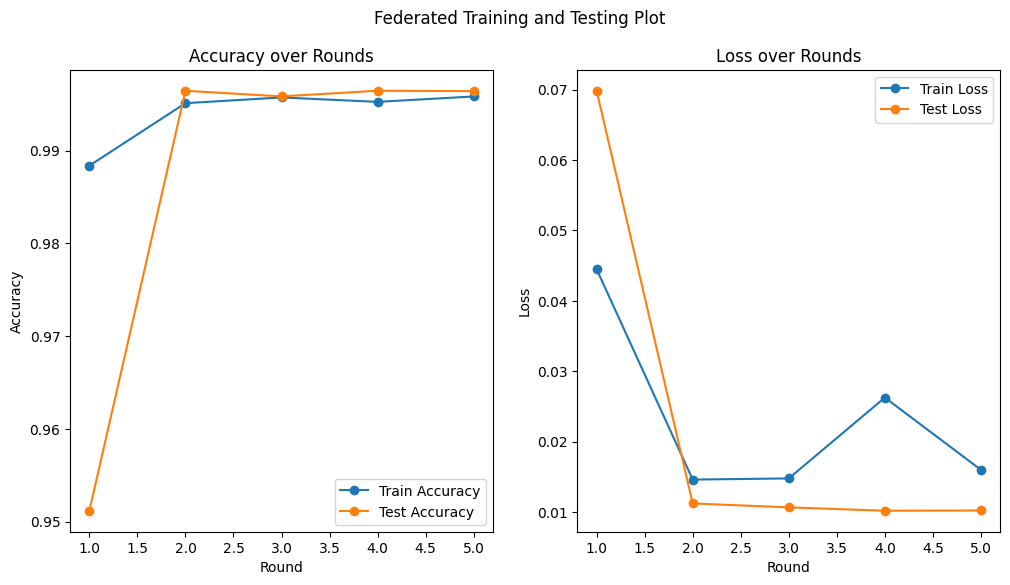

8802/8802 [==============================] - 18s 2ms/step


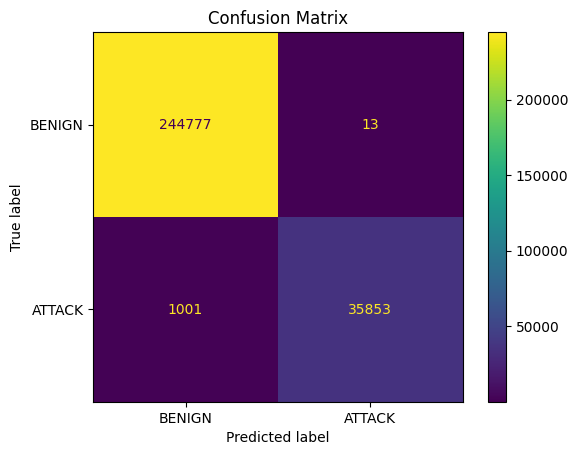

In [ ]:
import pandas as pd
import numpy as np
import collections
import tensorflow as tf
import tensorflow_federated as tff
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/CICIoV2024/hexadecimal.csv")

# Convert hexadecimal values to integers, only if they are valid hexadecimal strings
def hex_to_int(value):
    try:
        return int(str(value), 16)
    except ValueError:
        return value

hex_columns = ['DATA_0', 'DATA_1', 'DATA_2', 'DATA_3', 'DATA_4', 'DATA_5', 'DATA_6', 'DATA_7']
for col in hex_columns:
    df[col] = df[col].apply(hex_to_int)

# Encode string labels into numerical values
label_mapping = {label: index for index, label in enumerate(df['label'].unique())}
df['label'] = df['label'].map(label_mapping)

# Split the data into train and test sets (80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Create train data for clients
def create_tf_dataset_for_client(client_data):
    data = client_data[hex_columns].values.astype(np.float32)
    labels = client_data['label'].values.astype(np.int32)
    return tf.data.Dataset.from_tensor_slices((data, labels)).batch(32)

# Split the train_df into five parts
client_data_splits = np.array_split(train_df, 5)

# Create TF datasets for each client
train_data = [create_tf_dataset_for_client(client_data) for client_data in client_data_splits]

# Create a TF dataset for the test data
test_data = tf.data.Dataset.from_tensor_slices(
    (test_df[hex_columns].values.astype(np.float32), test_df['label'].values.astype(np.int32))
).batch(32)

# Define the Keras model
def build_keras_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Reshape((8, 1), input_shape=(8,)),
        tf.keras.layers.Conv1D(32, 2, activation='relu'),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Conv1D(64, 2, activation='relu'),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(np.max(df['label']) + 1, activation='softmax')
    ])
    return model

# Wrap a Keras model for use with TFF.
def model_fn():
    keras_model = build_keras_model()
    return tff.learning.models.from_keras_model(
        keras_model,
        input_spec=train_data[0].element_spec,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )

# Simulate a few rounds of training with the selected client devices.
trainer = tff.learning.algorithms.build_weighted_fed_avg(
    model_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.Adam(learning_rate=0.001)
)

state = trainer.initialize()

# Lists to store training and testing metrics
train_accuracies = []
train_losses = []
test_accuracies = []
test_losses = []

print("Training and Testing Results")

for round_num in range(5):
    # Training
    state, metrics = trainer.next(state, train_data)

    train_accuracy = metrics['client_work']['train']['sparse_categorical_accuracy']
    train_loss = metrics['client_work']['train']['loss']
    num_examples = metrics['client_work']['train']['num_examples']
    num_batches = metrics['client_work']['train']['num_batches']
    train_accuracies.append(train_accuracy)
    train_losses.append(train_loss)
    print(f'Round {round_num+1}, Training accuracy: {train_accuracy:.4f}, Training loss: {train_loss:.4f}, Num examples: {num_examples}, Num batches: {num_batches}')

    # Testing
    eval_process = tff.learning.build_federated_evaluation(model_fn)
    model_weights = trainer.get_model_weights(state)
    test_metrics = eval_process(model_weights, [test_data])['eval']
    test_accuracy = test_metrics['sparse_categorical_accuracy']
    test_loss = test_metrics['loss']
    test_accuracies.append(test_accuracy)
    test_losses.append(test_loss)
    #print(f"Round {round_num+1}, Testing accuracy: {test_accuracy:.4f}, Testing loss: {test_loss:.4f}, Num examples: {test_metrics['num_examples']}, Num batches: {test_metrics['num_batches']}")

# Plot training and testing results
rounds = range(1, 6)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(rounds, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(rounds, test_accuracies, marker='o', label='Test Accuracy')
plt.title('Accuracy over Rounds')
plt.xlabel('Round')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(rounds, train_losses, marker='o', label='Train Loss')
plt.plot(rounds, test_losses, marker='o', label='Test Loss')
plt.title('Loss over Rounds')
plt.xlabel('Round')
plt.ylabel('Loss')
plt.legend()

plt.suptitle('Federated Training and Testing Plot')
plt.show()

# Confusion Matrix
keras_model = build_keras_model()
keras_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
keras_model.set_weights(model_weights.trainable)

y_true = np.concatenate([y for x, y in test_data], axis=0)
y_pred = np.argmax(keras_model.predict(test_data), axis=1)
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(label_mapping.keys()))
disp.plot()
plt.title('Confusion Matrix')
plt.show()


# **Multi Classification using "category"**

**2 clients, 1D conv, Adam, lr=0.001**

<ipython-input-3-95da24d7bcdf>:11: DtypeWarning: Columns (1,5,7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/CICIoV2024/hexadecimal.csv")


Training and Testing Results
Round 1, Training accuracy: 0.9935, Training loss: 0.0211, Num examples: 1126575, Num batches: 35206


<ipython-input-3-95da24d7bcdf>:101: DeprecationWarning: `tff.learning.build_federated_evaluation` is deprecated, use `tff.learning.algorithms.build_fed_eval` instead.
  eval_process = tff.learning.build_federated_evaluation(model_fn)


Round 2, Training accuracy: 0.9956, Training loss: 0.0193, Num examples: 1126575, Num batches: 35206
Round 3, Training accuracy: 0.9741, Training loss: 0.3689, Num examples: 1126575, Num batches: 35206
Round 4, Training accuracy: 0.9922, Training loss: 0.0769, Num examples: 1126575, Num batches: 35206
Round 5, Training accuracy: 0.9928, Training loss: 0.0672, Num examples: 1126575, Num batches: 35206


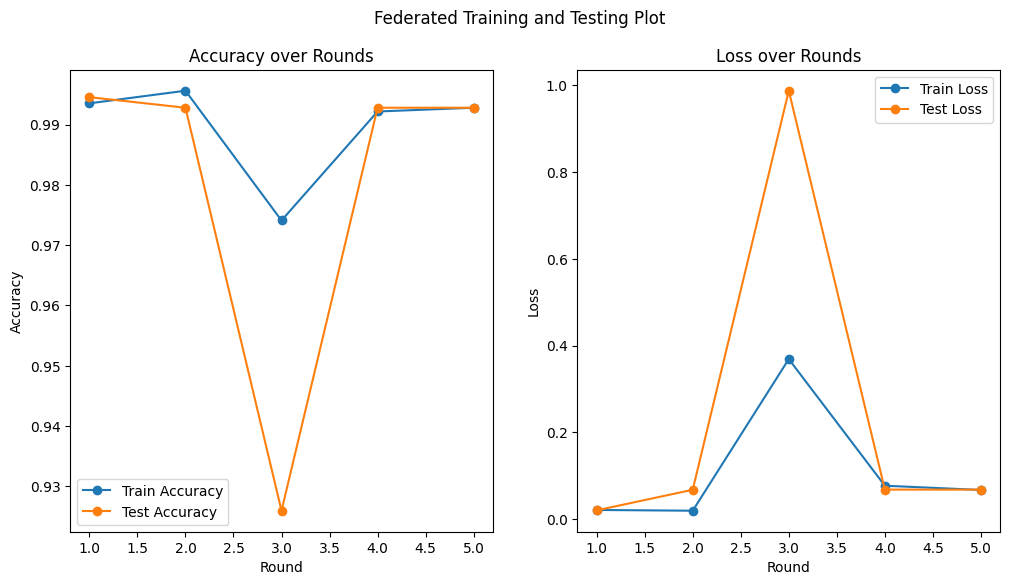

8802/8802 [==============================] - 21s 2ms/step


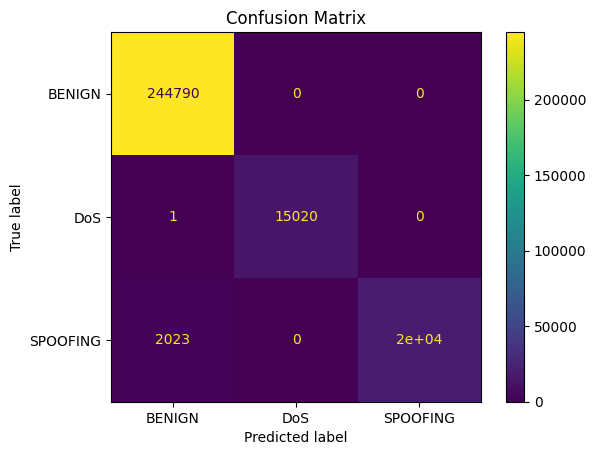

In [ ]:
import pandas as pd
import numpy as np
import collections
import tensorflow as tf
import tensorflow_federated as tff
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/CICIoV2024/hexadecimal.csv")

# Convert hexadecimal values to integers, only if they are valid hexadecimal strings
def hex_to_int(value):
    try:
        return int(str(value), 16)
    except ValueError:
        return value

hex_columns = ['DATA_0', 'DATA_1', 'DATA_2', 'DATA_3', 'DATA_4', 'DATA_5', 'DATA_6', 'DATA_7']
for col in hex_columns:
    df[col] = df[col].apply(hex_to_int)

# Encode string labels into numerical values
label_mapping = {label: index for index, label in enumerate(df['category'].unique())}
df['category'] = df['category'].map(label_mapping)

# Split the data into train and test sets (80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Create train data for clients
def create_tf_dataset_for_client(client_data):
    data = client_data[hex_columns].values.astype(np.float32)
    labels = client_data['category'].values.astype(np.int32)
    return tf.data.Dataset.from_tensor_slices((data, labels)).batch(32)

# Split the train_df into two parts
client_data_splits = np.array_split(train_df, 2)

# Create TF datasets for each client
train_data = [create_tf_dataset_for_client(client_data) for client_data in client_data_splits]

# Create a TF dataset for the test data
test_data = tf.data.Dataset.from_tensor_slices(
    (test_df[hex_columns].values.astype(np.float32), test_df['category'].values.astype(np.int32))
).batch(32)

# Define the Keras model
def build_keras_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Reshape((8, 1), input_shape=(8,)),
        tf.keras.layers.Conv1D(32, 2, activation='relu'),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Conv1D(64, 2, activation='relu'),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(np.max(df['category']) + 1, activation='softmax')
    ])
    return model

# Wrap a Keras model for use with TFF.
def model_fn():
    keras_model = build_keras_model()
    return tff.learning.models.from_keras_model(
        keras_model,
        input_spec=train_data[0].element_spec,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )

# Simulate a few rounds of training with the selected client devices.
trainer = tff.learning.algorithms.build_weighted_fed_avg(
    model_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.Adam(learning_rate=0.001)
)

state = trainer.initialize()

# Lists to store training and testing metrics
train_accuracies = []
train_losses = []
test_accuracies = []
test_losses = []

print("Training and Testing Results")

for round_num in range(5):
    # Training
    state, metrics = trainer.next(state, train_data)

    train_accuracy = metrics['client_work']['train']['sparse_categorical_accuracy']
    train_loss = metrics['client_work']['train']['loss']
    num_examples = metrics['client_work']['train']['num_examples']
    num_batches = metrics['client_work']['train']['num_batches']
    train_accuracies.append(train_accuracy)
    train_losses.append(train_loss)
    print(f'Round {round_num+1}, Training accuracy: {train_accuracy:.4f}, Training loss: {train_loss:.4f}, Num examples: {num_examples}, Num batches: {num_batches}')

    # Testing
    eval_process = tff.learning.build_federated_evaluation(model_fn)
    model_weights = trainer.get_model_weights(state)
    test_metrics = eval_process(model_weights, [test_data])['eval']
    test_accuracy = test_metrics['sparse_categorical_accuracy']
    test_loss = test_metrics['loss']
    test_accuracies.append(test_accuracy)
    test_losses.append(test_loss)
    #print(f"Round {round_num+1}, Testing accuracy: {test_accuracy:.4f}, Testing loss: {test_loss:.4f}, Num examples: {test_metrics['num_examples']}, Num batches: {test_metrics['num_batches']}")

# Plot training and testing results
rounds = range(1, 6)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(rounds, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(rounds, test_accuracies, marker='o', label='Test Accuracy')
plt.title('Accuracy over Rounds')
plt.xlabel('Round')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(rounds, train_losses, marker='o', label='Train Loss')
plt.plot(rounds, test_losses, marker='o', label='Test Loss')
plt.title('Loss over Rounds')
plt.xlabel('Round')
plt.ylabel('Loss')
plt.legend()

plt.suptitle('Federated Training and Testing Plot')
plt.show()

# Confusion Matrix
keras_model = build_keras_model()
keras_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
keras_model.set_weights(model_weights.trainable)

y_true = np.concatenate([y for x, y in test_data], axis=0)
y_pred = np.argmax(keras_model.predict(test_data), axis=1)
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(label_mapping.keys()))
disp.plot()
plt.title('Confusion Matrix')
plt.show()


**5 clients, 1D conv, Adam, lr=0.001**

<ipython-input-4-c9431e6dfcf4>:11: DtypeWarning: Columns (1,5,7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/CICIoV2024/hexadecimal.csv")


Training and Testing Results
Round 1, Training accuracy: 0.9907, Training loss: 0.0359, Num examples: 1126575, Num batches: 35210


<ipython-input-4-c9431e6dfcf4>:101: DeprecationWarning: `tff.learning.build_federated_evaluation` is deprecated, use `tff.learning.algorithms.build_fed_eval` instead.
  eval_process = tff.learning.build_federated_evaluation(model_fn)


Round 2, Training accuracy: 0.9954, Training loss: 0.0148, Num examples: 1126575, Num batches: 35210
Round 3, Training accuracy: 0.9961, Training loss: 0.0117, Num examples: 1126575, Num batches: 35210
Round 4, Training accuracy: 0.9960, Training loss: 0.0135, Num examples: 1126575, Num batches: 35210
Round 5, Training accuracy: 0.9952, Training loss: 0.0283, Num examples: 1126575, Num batches: 35210


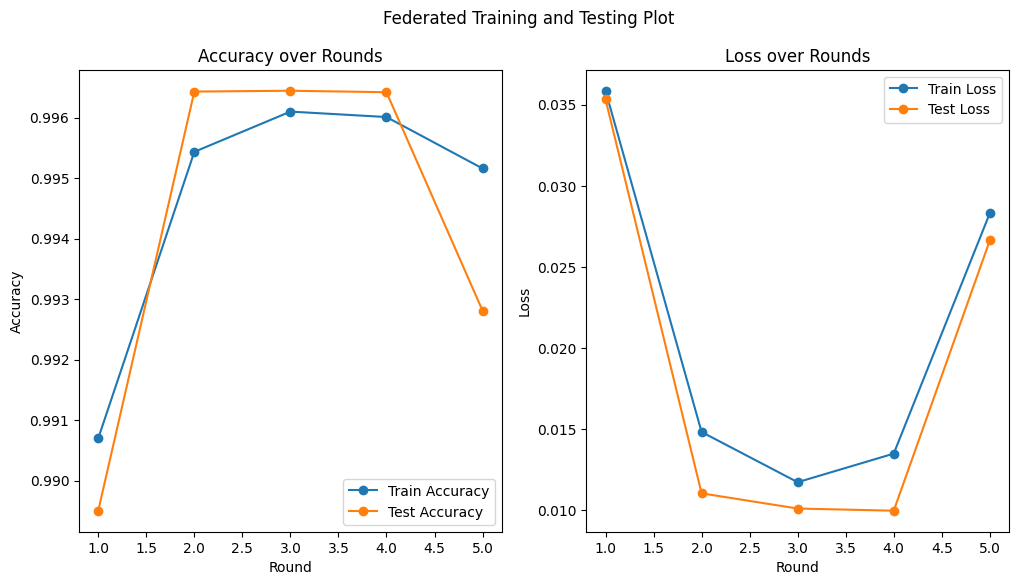

8802/8802 [==============================] - 26s 3ms/step


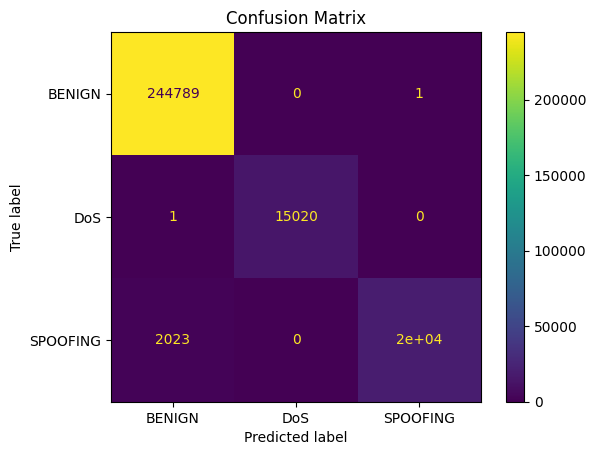

In [ ]:
import pandas as pd
import numpy as np
import collections
import tensorflow as tf
import tensorflow_federated as tff
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/CICIoV2024/hexadecimal.csv")

# Convert hexadecimal values to integers, only if they are valid hexadecimal strings
def hex_to_int(value):
    try:
        return int(str(value), 16)
    except ValueError:
        return value

hex_columns = ['DATA_0', 'DATA_1', 'DATA_2', 'DATA_3', 'DATA_4', 'DATA_5', 'DATA_6', 'DATA_7']
for col in hex_columns:
    df[col] = df[col].apply(hex_to_int)

# Encode string labels into numerical values
label_mapping = {label: index for index, label in enumerate(df['category'].unique())}
df['category'] = df['category'].map(label_mapping)

# Split the data into train and test sets (80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Create train data for clients
def create_tf_dataset_for_client(client_data):
    data = client_data[hex_columns].values.astype(np.float32)
    labels = client_data['category'].values.astype(np.int32)
    return tf.data.Dataset.from_tensor_slices((data, labels)).batch(32)

# Split the train_df into five parts
client_data_splits = np.array_split(train_df, 5)

# Create TF datasets for each client
train_data = [create_tf_dataset_for_client(client_data) for client_data in client_data_splits]

# Create a TF dataset for the test data
test_data = tf.data.Dataset.from_tensor_slices(
    (test_df[hex_columns].values.astype(np.float32), test_df['category'].values.astype(np.int32))
).batch(32)

# Define the Keras model
def build_keras_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Reshape((8, 1), input_shape=(8,)),
        tf.keras.layers.Conv1D(32, 2, activation='relu'),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Conv1D(64, 2, activation='relu'),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(np.max(df['category']) + 1, activation='softmax')
    ])
    return model

# Wrap a Keras model for use with TFF.
def model_fn():
    keras_model = build_keras_model()
    return tff.learning.models.from_keras_model(
        keras_model,
        input_spec=train_data[0].element_spec,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )

# Simulate a few rounds of training with the selected client devices.
trainer = tff.learning.algorithms.build_weighted_fed_avg(
    model_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.Adam(learning_rate=0.001)
)

state = trainer.initialize()

# Lists to store training and testing metrics
train_accuracies = []
train_losses = []
test_accuracies = []
test_losses = []

print("Training and Testing Results")

for round_num in range(5):
    # Training
    state, metrics = trainer.next(state, train_data)

    train_accuracy = metrics['client_work']['train']['sparse_categorical_accuracy']
    train_loss = metrics['client_work']['train']['loss']
    num_examples = metrics['client_work']['train']['num_examples']
    num_batches = metrics['client_work']['train']['num_batches']
    train_accuracies.append(train_accuracy)
    train_losses.append(train_loss)
    print(f'Round {round_num+1}, Training accuracy: {train_accuracy:.4f}, Training loss: {train_loss:.4f}, Num examples: {num_examples}, Num batches: {num_batches}')

    # Testing
    eval_process = tff.learning.build_federated_evaluation(model_fn)
    model_weights = trainer.get_model_weights(state)
    test_metrics = eval_process(model_weights, [test_data])['eval']
    test_accuracy = test_metrics['sparse_categorical_accuracy']
    test_loss = test_metrics['loss']
    test_accuracies.append(test_accuracy)
    test_losses.append(test_loss)
    #print(f"Round {round_num+1}, Testing accuracy: {test_accuracy:.4f}, Testing loss: {test_loss:.4f}, Num examples: {test_metrics['num_examples']}, Num batches: {test_metrics['num_batches']}")

# Plot training and testing results
rounds = range(1, 6)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(rounds, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(rounds, test_accuracies, marker='o', label='Test Accuracy')
plt.title('Accuracy over Rounds')
plt.xlabel('Round')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(rounds, train_losses, marker='o', label='Train Loss')
plt.plot(rounds, test_losses, marker='o', label='Test Loss')
plt.title('Loss over Rounds')
plt.xlabel('Round')
plt.ylabel('Loss')
plt.legend()

plt.suptitle('Federated Training and Testing Plot')
plt.show()

# Confusion Matrix
keras_model = build_keras_model()
keras_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
keras_model.set_weights(model_weights.trainable)

y_true = np.concatenate([y for x, y in test_data], axis=0)
y_pred = np.argmax(keras_model.predict(test_data), axis=1)
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(label_mapping.keys()))
disp.plot()
plt.title('Confusion Matrix')
plt.show()


# **Multi Classification using "specific_class"**

**2 clients, 1D conv, Adam, lr=0.001**

<ipython-input-5-a07f9732234a>:11: DtypeWarning: Columns (1,5,7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/CICIoV2024/hexadecimal.csv")


Training and Testing Results
Round 1, Training accuracy: 0.9898, Training loss: 0.0318, Num examples: 1126575, Num batches: 35206


<ipython-input-5-a07f9732234a>:101: DeprecationWarning: `tff.learning.build_federated_evaluation` is deprecated, use `tff.learning.algorithms.build_fed_eval` instead.
  eval_process = tff.learning.build_federated_evaluation(model_fn)


Round 2, Training accuracy: 0.9926, Training loss: 0.0183, Num examples: 1126575, Num batches: 35206
Round 3, Training accuracy: 0.9921, Training loss: 0.0263, Num examples: 1126575, Num batches: 35206
Round 4, Training accuracy: 0.9899, Training loss: 0.0616, Num examples: 1126575, Num batches: 35206
Round 5, Training accuracy: 0.9829, Training loss: 0.1753, Num examples: 1126575, Num batches: 35206


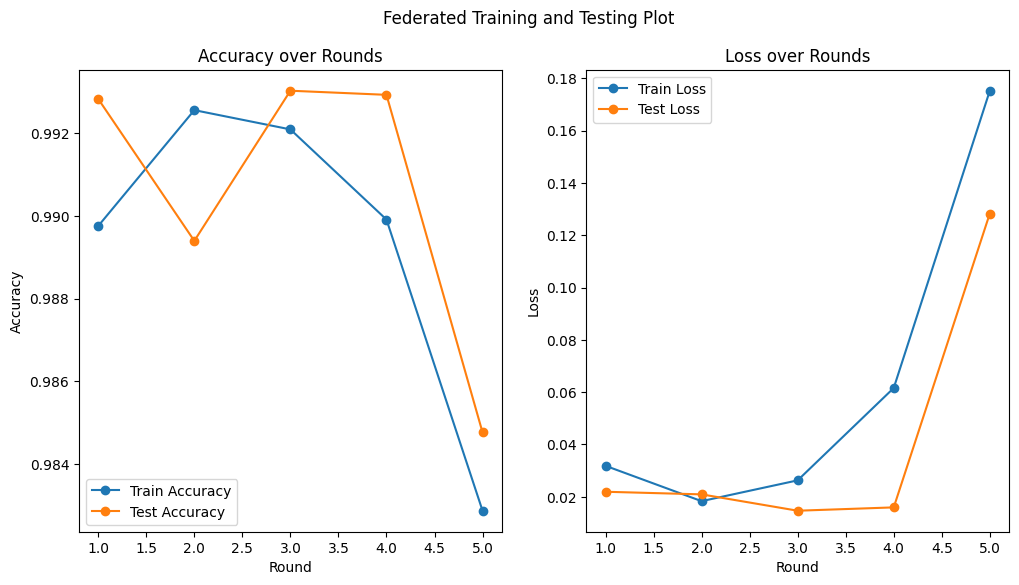

8802/8802 [==============================] - 21s 2ms/step


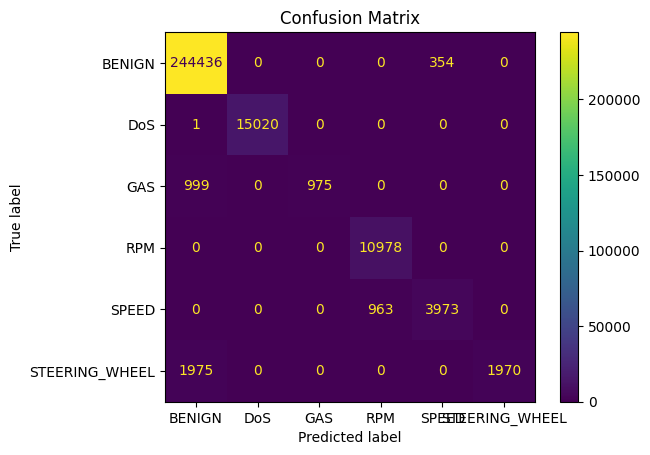

In [ ]:
import pandas as pd
import numpy as np
import collections
import tensorflow as tf
import tensorflow_federated as tff
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/CICIoV2024/hexadecimal.csv")

# Convert hexadecimal values to integers, only if they are valid hexadecimal strings
def hex_to_int(value):
    try:
        return int(str(value), 16)
    except ValueError:
        return value

hex_columns = ['DATA_0', 'DATA_1', 'DATA_2', 'DATA_3', 'DATA_4', 'DATA_5', 'DATA_6', 'DATA_7']
for col in hex_columns:
    df[col] = df[col].apply(hex_to_int)

# Encode string labels into numerical values
label_mapping = {label: index for index, label in enumerate(df['specific_class'].unique())}
df['specific_class'] = df['specific_class'].map(label_mapping)

# Split the data into train and test sets (80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Create train data for clients
def create_tf_dataset_for_client(client_data):
    data = client_data[hex_columns].values.astype(np.float32)
    labels = client_data['specific_class'].values.astype(np.int32)
    return tf.data.Dataset.from_tensor_slices((data, labels)).batch(32)

# Split the train_df into two parts
client_data_splits = np.array_split(train_df, 2)

# Create TF datasets for each client
train_data = [create_tf_dataset_for_client(client_data) for client_data in client_data_splits]

# Create a TF dataset for the test data
test_data = tf.data.Dataset.from_tensor_slices(
    (test_df[hex_columns].values.astype(np.float32), test_df['specific_class'].values.astype(np.int32))
).batch(32)

# Define the Keras model
def build_keras_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Reshape((8, 1), input_shape=(8,)),
        tf.keras.layers.Conv1D(32, 2, activation='relu'),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Conv1D(64, 2, activation='relu'),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(np.max(df['specific_class']) + 1, activation='softmax')
    ])
    return model

# Wrap a Keras model for use with TFF.
def model_fn():
    keras_model = build_keras_model()
    return tff.learning.models.from_keras_model(
        keras_model,
        input_spec=train_data[0].element_spec,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )

# Simulate a few rounds of training with the selected client devices.
trainer = tff.learning.algorithms.build_weighted_fed_avg(
    model_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.Adam(learning_rate=0.001)
)

state = trainer.initialize()

# Lists to store training and testing metrics
train_accuracies = []
train_losses = []
test_accuracies = []
test_losses = []

print("Training and Testing Results")

for round_num in range(5):
    # Training
    state, metrics = trainer.next(state, train_data)

    train_accuracy = metrics['client_work']['train']['sparse_categorical_accuracy']
    train_loss = metrics['client_work']['train']['loss']
    num_examples = metrics['client_work']['train']['num_examples']
    num_batches = metrics['client_work']['train']['num_batches']
    train_accuracies.append(train_accuracy)
    train_losses.append(train_loss)
    print(f'Round {round_num+1}, Training accuracy: {train_accuracy:.4f}, Training loss: {train_loss:.4f}, Num examples: {num_examples}, Num batches: {num_batches}')

    # Testing
    eval_process = tff.learning.build_federated_evaluation(model_fn)
    model_weights = trainer.get_model_weights(state)
    test_metrics = eval_process(model_weights, [test_data])['eval']
    test_accuracy = test_metrics['sparse_categorical_accuracy']
    test_loss = test_metrics['loss']
    test_accuracies.append(test_accuracy)
    test_losses.append(test_loss)
    #print(f"Round {round_num+1}, Testing accuracy: {test_accuracy:.4f}, Testing loss: {test_loss:.4f}, Num examples: {test_metrics['num_examples']}, Num batches: {test_metrics['num_batches']}")

# Plot training and testing results
rounds = range(1, 6)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(rounds, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(rounds, test_accuracies, marker='o', label='Test Accuracy')
plt.title('Accuracy over Rounds')
plt.xlabel('Round')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(rounds, train_losses, marker='o', label='Train Loss')
plt.plot(rounds, test_losses, marker='o', label='Test Loss')
plt.title('Loss over Rounds')
plt.xlabel('Round')
plt.ylabel('Loss')
plt.legend()

plt.suptitle('Federated Training and Testing Plot')
plt.show()

# Confusion Matrix
keras_model = build_keras_model()
keras_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
keras_model.set_weights(model_weights.trainable)

y_true = np.concatenate([y for x, y in test_data], axis=0)
y_pred = np.argmax(keras_model.predict(test_data), axis=1)
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(label_mapping.keys()))
disp.plot()
plt.title('Confusion Matrix')
plt.show()


**5 clients, 1D conv, Adam, lr=0.001**

<ipython-input-6-86f9c1c02a5c>:11: DtypeWarning: Columns (1,5,7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/CICIoV2024/hexadecimal.csv")


Training and Testing Results
Round 1, Training accuracy: 0.9790, Training loss: 0.1689, Num examples: 1126575, Num batches: 35210


<ipython-input-6-86f9c1c02a5c>:101: DeprecationWarning: `tff.learning.build_federated_evaluation` is deprecated, use `tff.learning.algorithms.build_fed_eval` instead.
  eval_process = tff.learning.build_federated_evaluation(model_fn)


Round 2, Training accuracy: 0.9914, Training loss: 0.0261, Num examples: 1126575, Num batches: 35210
Round 3, Training accuracy: 0.9922, Training loss: 0.0213, Num examples: 1126575, Num batches: 35210
Round 4, Training accuracy: 0.9906, Training loss: 0.0500, Num examples: 1126575, Num batches: 35210
Round 5, Training accuracy: 0.9888, Training loss: 0.0804, Num examples: 1126575, Num batches: 35210


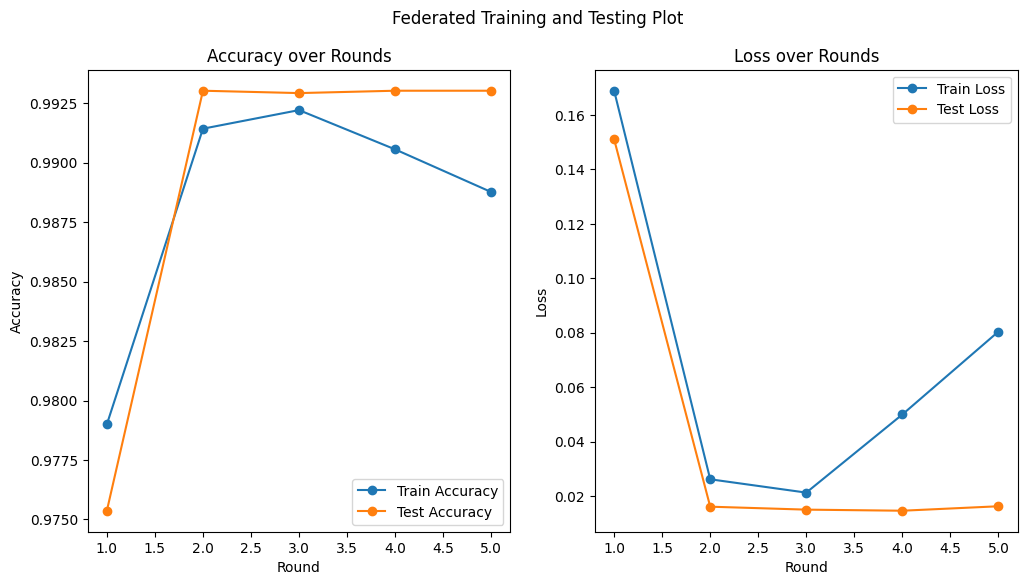

8802/8802 [==============================] - 20s 2ms/step


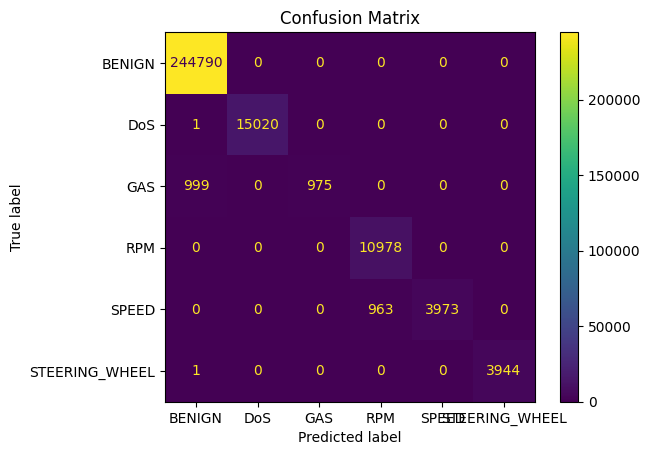

In [ ]:
import pandas as pd
import numpy as np
import collections
import tensorflow as tf
import tensorflow_federated as tff
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/CICIoV2024/hexadecimal.csv")

# Convert hexadecimal values to integers, only if they are valid hexadecimal strings
def hex_to_int(value):
    try:
        return int(str(value), 16)
    except ValueError:
        return value

hex_columns = ['DATA_0', 'DATA_1', 'DATA_2', 'DATA_3', 'DATA_4', 'DATA_5', 'DATA_6', 'DATA_7']
for col in hex_columns:
    df[col] = df[col].apply(hex_to_int)

# Encode string labels into numerical values
label_mapping = {label: index for index, label in enumerate(df['specific_class'].unique())}
df['specific_class'] = df['specific_class'].map(label_mapping)

# Split the data into train and test sets (80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Create train data for clients
def create_tf_dataset_for_client(client_data):
    data = client_data[hex_columns].values.astype(np.float32)
    labels = client_data['specific_class'].values.astype(np.int32)
    return tf.data.Dataset.from_tensor_slices((data, labels)).batch(32)

# Split the train_df into five parts
client_data_splits = np.array_split(train_df, 5)

# Create TF datasets for each client
train_data = [create_tf_dataset_for_client(client_data) for client_data in client_data_splits]

# Create a TF dataset for the test data
test_data = tf.data.Dataset.from_tensor_slices(
    (test_df[hex_columns].values.astype(np.float32), test_df['specific_class'].values.astype(np.int32))
).batch(32)

# Define the Keras model
def build_keras_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Reshape((8, 1), input_shape=(8,)),
        tf.keras.layers.Conv1D(32, 2, activation='relu'),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Conv1D(64, 2, activation='relu'),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(np.max(df['specific_class']) + 1, activation='softmax')
    ])
    return model

# Wrap a Keras model for use with TFF.
def model_fn():
    keras_model = build_keras_model()
    return tff.learning.models.from_keras_model(
        keras_model,
        input_spec=train_data[0].element_spec,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )

# Simulate a few rounds of training with the selected client devices.
trainer = tff.learning.algorithms.build_weighted_fed_avg(
    model_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.Adam(learning_rate=0.001)
)

state = trainer.initialize()

# Lists to store training and testing metrics
train_accuracies = []
train_losses = []
test_accuracies = []
test_losses = []

print("Training and Testing Results")

for round_num in range(5):
    # Training
    state, metrics = trainer.next(state, train_data)

    train_accuracy = metrics['client_work']['train']['sparse_categorical_accuracy']
    train_loss = metrics['client_work']['train']['loss']
    num_examples = metrics['client_work']['train']['num_examples']
    num_batches = metrics['client_work']['train']['num_batches']
    train_accuracies.append(train_accuracy)
    train_losses.append(train_loss)
    print(f'Round {round_num+1}, Training accuracy: {train_accuracy:.4f}, Training loss: {train_loss:.4f}, Num examples: {num_examples}, Num batches: {num_batches}')

    # Testing
    eval_process = tff.learning.build_federated_evaluation(model_fn)
    model_weights = trainer.get_model_weights(state)
    test_metrics = eval_process(model_weights, [test_data])['eval']
    test_accuracy = test_metrics['sparse_categorical_accuracy']
    test_loss = test_metrics['loss']
    test_accuracies.append(test_accuracy)
    test_losses.append(test_loss)
    #print(f"Round {round_num+1}, Testing accuracy: {test_accuracy:.4f}, Testing loss: {test_loss:.4f}, Num examples: {test_metrics['num_examples']}, Num batches: {test_metrics['num_batches']}")

# Plot training and testing results
rounds = range(1, 6)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(rounds, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(rounds, test_accuracies, marker='o', label='Test Accuracy')
plt.title('Accuracy over Rounds')
plt.xlabel('Round')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(rounds, train_losses, marker='o', label='Train Loss')
plt.plot(rounds, test_losses, marker='o', label='Test Loss')
plt.title('Loss over Rounds')
plt.xlabel('Round')
plt.ylabel('Loss')
plt.legend()

plt.suptitle('Federated Training and Testing Plot')
plt.show()

# Confusion Matrix
keras_model = build_keras_model()
keras_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
keras_model.set_weights(model_weights.trainable)

y_true = np.concatenate([y for x, y in test_data], axis=0)
y_pred = np.argmax(keras_model.predict(test_data), axis=1)
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(label_mapping.keys()))
disp.plot()
plt.title('Confusion Matrix')
plt.show()


**7 clients, 1D conv, Adam, lr=0.001**

<ipython-input-7-e8ddf867e8ff>:11: DtypeWarning: Columns (1,5,7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/CICIoV2024/hexadecimal.csv")


Training and Testing Results
Round 1, Training accuracy: 0.9835, Training loss: 0.0784, Num examples: 1126575, Num batches: 35210


<ipython-input-7-e8ddf867e8ff>:101: DeprecationWarning: `tff.learning.build_federated_evaluation` is deprecated, use `tff.learning.algorithms.build_fed_eval` instead.
  eval_process = tff.learning.build_federated_evaluation(model_fn)


Round 2, Training accuracy: 0.9917, Training loss: 0.0203, Num examples: 1126575, Num batches: 35210
Round 3, Training accuracy: 0.9922, Training loss: 0.0209, Num examples: 1126575, Num batches: 35210
Round 4, Training accuracy: 0.9924, Training loss: 0.0202, Num examples: 1126575, Num batches: 35210
Round 5, Training accuracy: 0.9922, Training loss: 0.0239, Num examples: 1126575, Num batches: 35210


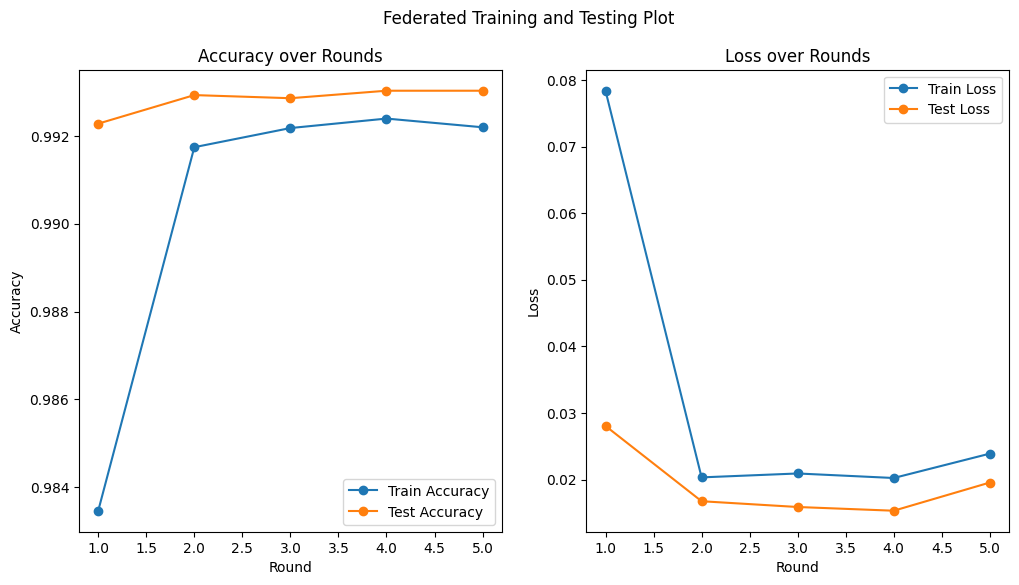

8802/8802 [==============================] - 19s 2ms/step


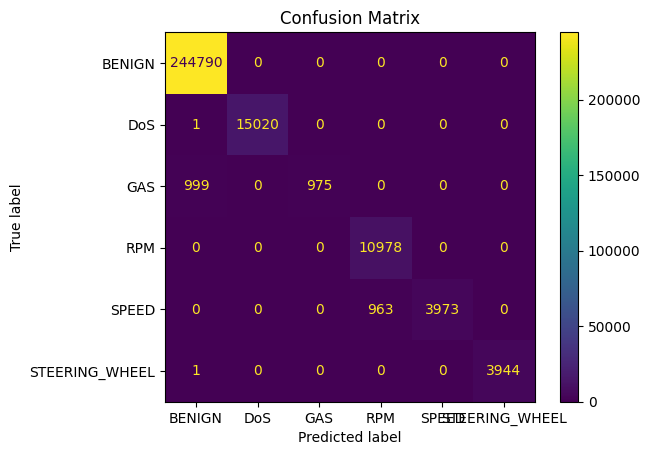

In [ ]:
import pandas as pd
import numpy as np
import collections
import tensorflow as tf
import tensorflow_federated as tff
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/CICIoV2024/hexadecimal.csv")

# Convert hexadecimal values to integers, only if they are valid hexadecimal strings
def hex_to_int(value):
    try:
        return int(str(value), 16)
    except ValueError:
        return value

hex_columns = ['DATA_0', 'DATA_1', 'DATA_2', 'DATA_3', 'DATA_4', 'DATA_5', 'DATA_6', 'DATA_7']
for col in hex_columns:
    df[col] = df[col].apply(hex_to_int)

# Encode string labels into numerical values
label_mapping = {label: index for index, label in enumerate(df['specific_class'].unique())}
df['specific_class'] = df['specific_class'].map(label_mapping)

# Split the data into train and test sets (80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Create train data for clients
def create_tf_dataset_for_client(client_data):
    data = client_data[hex_columns].values.astype(np.float32)
    labels = client_data['specific_class'].values.astype(np.int32)
    return tf.data.Dataset.from_tensor_slices((data, labels)).batch(32)

# Split the train_df into seven parts
client_data_splits = np.array_split(train_df, 7)

# Create TF datasets for each client
train_data = [create_tf_dataset_for_client(client_data) for client_data in client_data_splits]

# Create a TF dataset for the test data
test_data = tf.data.Dataset.from_tensor_slices(
    (test_df[hex_columns].values.astype(np.float32), test_df['specific_class'].values.astype(np.int32))
).batch(32)

# Define the Keras model
def build_keras_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Reshape((8, 1), input_shape=(8,)),
        tf.keras.layers.Conv1D(32, 2, activation='relu'),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Conv1D(64, 2, activation='relu'),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(np.max(df['specific_class']) + 1, activation='softmax')
    ])
    return model

# Wrap a Keras model for use with TFF.
def model_fn():
    keras_model = build_keras_model()
    return tff.learning.models.from_keras_model(
        keras_model,
        input_spec=train_data[0].element_spec,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )

# Simulate a few rounds of training with the selected client devices.
trainer = tff.learning.algorithms.build_weighted_fed_avg(
    model_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.Adam(learning_rate=0.001)
)

state = trainer.initialize()

# Lists to store training and testing metrics
train_accuracies = []
train_losses = []
test_accuracies = []
test_losses = []

print("Training and Testing Results")

for round_num in range(5):
    # Training
    state, metrics = trainer.next(state, train_data)

    train_accuracy = metrics['client_work']['train']['sparse_categorical_accuracy']
    train_loss = metrics['client_work']['train']['loss']
    num_examples = metrics['client_work']['train']['num_examples']
    num_batches = metrics['client_work']['train']['num_batches']
    train_accuracies.append(train_accuracy)
    train_losses.append(train_loss)
    print(f'Round {round_num+1}, Training accuracy: {train_accuracy:.4f}, Training loss: {train_loss:.4f}, Num examples: {num_examples}, Num batches: {num_batches}')

    # Testing
    eval_process = tff.learning.build_federated_evaluation(model_fn)
    model_weights = trainer.get_model_weights(state)
    test_metrics = eval_process(model_weights, [test_data])['eval']
    test_accuracy = test_metrics['sparse_categorical_accuracy']
    test_loss = test_metrics['loss']
    test_accuracies.append(test_accuracy)
    test_losses.append(test_loss)
    #print(f"Round {round_num+1}, Testing accuracy: {test_accuracy:.4f}, Testing loss: {test_loss:.4f}, Num examples: {test_metrics['num_examples']}, Num batches: {test_metrics['num_batches']}")

# Plot training and testing results
rounds = range(1, 6)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(rounds, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(rounds, test_accuracies, marker='o', label='Test Accuracy')
plt.title('Accuracy over Rounds')
plt.xlabel('Round')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(rounds, train_losses, marker='o', label='Train Loss')
plt.plot(rounds, test_losses, marker='o', label='Test Loss')
plt.title('Loss over Rounds')
plt.xlabel('Round')
plt.ylabel('Loss')
plt.legend()

plt.suptitle('Federated Training and Testing Plot')
plt.show()

# Confusion Matrix
keras_model = build_keras_model()
keras_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
keras_model.set_weights(model_weights.trainable)

y_true = np.concatenate([y for x, y in test_data], axis=0)
y_pred = np.argmax(keras_model.predict(test_data), axis=1)
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(label_mapping.keys()))
disp.plot()
plt.title('Confusion Matrix')
plt.show()
